# [Line Charts](https://www.kaggle.com/code/alexisbcook/line-charts)
## Core Lesson

In [95]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random as rd

# Import prepped data
lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')
pit_stops  = pd.read_csv('./intermediate/pit_stops_prepped.csv')
qualifying = pd.read_csv('./intermediate/qualifying_prepped.csv')
results    = pd.read_csv('./intermediate/results_prepped.csv')

/var/folders/0p/fnlsdkq159s9phmzxxmms5pc0000gn/T/ipykernel_13899/2437462414.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')


`seaborn` line plots use the `lineplot` function, where the data-frame to be plotted is specified in the `data` argument, and aesthetics are then assigned to attributes such as `x`, `y`, `hue`, etc.

So if we were to plot Sebastian Vettel's lap times across the first few Grands Prix of 2016, this is how we'd do it:

In [21]:
lap_times.head()

,lap,position,milliseconds,year,round,circuitId,name,date,driverRef,number,code,forename,surname,nationality,seconds
0,1,1,98109,2011,1,1,Australian Grand Prix,27/03/11,vettel,5,VET,Sebastian,Vettel,German,98.109
1,2,1,93006,2011,1,1,Australian Grand Prix,27/03/11,vettel,5,VET,Sebastian,Vettel,German,93.006
2,3,1,92713,2011,1,1,Australian Grand Prix,27/03/11,vettel,5,VET,Sebastian,Vettel,German,92.713
3,4,1,92803,2011,1,1,Australian Grand Prix,27/03/11,vettel,5,VET,Sebastian,Vettel,German,92.803
4,5,1,92342,2011,1,1,Australian Grand Prix,27/03/11,vettel,5,VET,Sebastian,Vettel,German,92.342


<function matplotlib.pyplot.close(fig=None)>

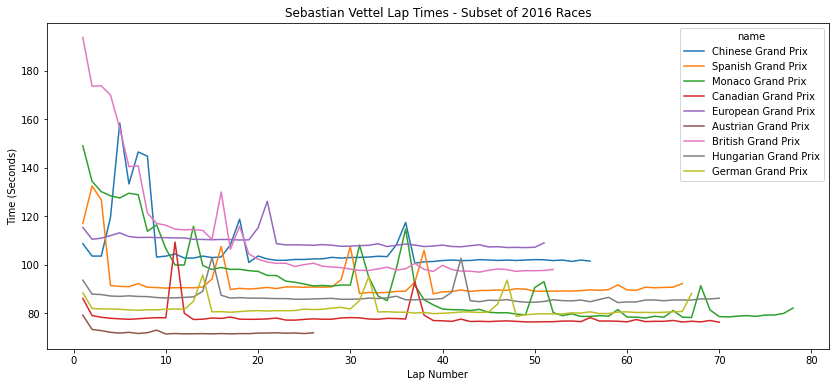

In [34]:
# Plotting by seconds for ease of interpretation (vs. milliseconds)
lap_times['seconds'] = lap_times['milliseconds'] / 1000

lap_times_vettel_2016 = lap_times.loc[
    (lap_times['driverRef'] == 'vettel') & 
    (lap_times['year'] == 2016) & 
    (lap_times['round'] >= 2) &
    (lap_times['round'] <= 12)
]

# Plot
plt.figure(figsize = (14, 6))
plt.title("Sebastian Vettel Lap Times - Subset of 2016 Races")

sns.lineplot(data = lap_times_vettel_2016, x = 'lap', y = 'seconds', hue = 'name')

plt.xlabel('Lap Number')
plt.ylabel('Time (Seconds)')
plt.close()

## Further exploration

Vettel's lap times appear fairly consistent over the course of each race, with a few exceptions:
* The time taken for the first lap is always greater than that of the lap that comes after it (with the exception of Safety Cars and other incidents). This is because the cars start this first lap from a standing start.
* Lap times observed during the [British](https://en.wikipedia.org/wiki/2016_British_Grand_Prix) and [Monégasque](https://en.wikipedia.org/wiki/2016_Monaco_Grand_Prix) Grands Prix are seen to start off high, and gradually come down to a steady equilibrium. Both of these races started off wet/rainy, with conditions gradually drying up. What we're seeing is Vettel gaining more grip and getting faster each successive lap due to conditions clearing and cars progressively clearing water off track with intermediate/wet tyres.
* The first few laps of the Spanish Grand Prix are seen to be significantly slower than the rest of the lap times for that race; [this coincides with a Safety Car being brought out](https://en.wikipedia.org/wiki/2016_Spanish_Grand_Prix#Race) (and hence, drivers being forced to drive slower behind it) due to the two Mercedes drivers colliding early in the race.
* The significantly slower times seen in the early laps of the Chinese Grand Prix were [also due to a Safety Car](https://en.wikipedia.org/wiki/2016_Chinese_Grand_Prix#Race).

Something to note when viewing this chart is that the number of laps in each Grand Prix differs. This is because regulations posit a [minimum **distance** (305km)](https://onestopracing.com/how-long-is-an-f1-race/#:~:text=The%20number%20of%20laps%20completed,circuit%20will%20have%20the%20least.) for each race. This is why the tracks with shorter lap times (as a partially flawed proxy for track length) can be seen to have more laps than those with longer lap times (which are presumably longer tracks).
* One anomaly here is the Austrian Grand Prix, which only has 26 laps recorded since [Vettel was forced to retire on lap 26 due to a tyre failure](https://en.wikipedia.org/wiki/2016_Austrian_Grand_Prix#Post-race).

The final thing we'll point out here is that the relatively (and remarkably) consistent lap times are punctuated by laps that are substantially slower than the immediately adjacent lap times. We can show that these correspond to pit-stops where Vettel would be required to drive into the pits (with a speed limit of generally 80km/h), then come to a stop for ~2 seconds while the pit crew switch his tyres.

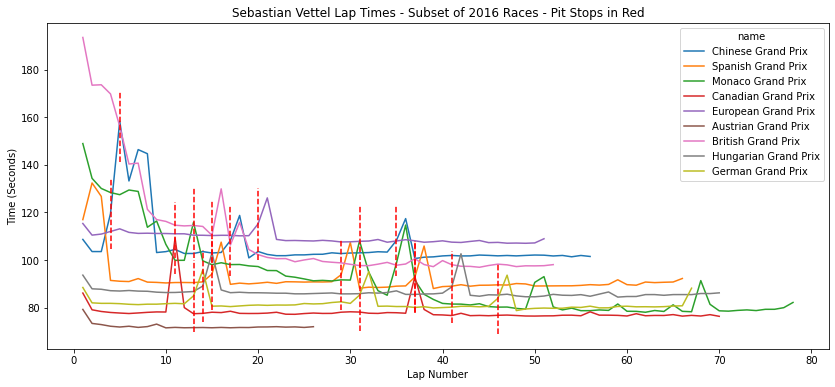

In [75]:
pit_stops_vettel_2016 = pit_stops.loc[
    (pit_stops['driverRef'] == 'vettel') & 
    (pit_stops['year'] == 2016) & 
    (pit_stops['round'] >= 2) &
    (pit_stops['round'] <= 12)
][['lap', 'year', 'round']]

pit_stops_vettel_2016_w_lap_times = (
    pit_stops_vettel_2016
        .merge(
            lap_times_vettel_2016[['lap', 'year', 'round', 'seconds']],
            how = 'left',
            on = ['lap', 'year', 'round']
        )
)

# Open plot
plt.figure(figsize = (14, 6))
plt.title("Sebastian Vettel Lap Times - Subset of 2016 Races - Pit Stops in Red")

sns.lineplot(data = lap_times_vettel_2016, x = 'lap', y = 'seconds', hue = 'name')

for i in range(len(pit_stops_vettel_2016_w_lap_times)):
    tmp_info = pit_stops_vettel_2016_w_lap_times.iloc[i]
    plt.vlines(
        x = tmp_info['lap'], 
        ymin = tmp_info['seconds'] - 15, 
        ymax = tmp_info['seconds'] + 15, 
        color = 'r', 
        linestyles = 'dashed'
    )


plt.xlabel('Lap Number')
plt.ylabel('Time (Seconds)')
plt.pause(0.1)
plt.close()

## Pit Stop Timing

The last thing we'll do here is have a look at how pit stops have evolved over time, either through team innovations, or changes required from a regulation standpoint.

In [76]:
print(pit_stops.apply(lambda col: col.unique()))

stop                                           [1, 2, 3, 4, 5, 6]
lap             [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 26...
milliseconds    [26898, 25021, 23426, 23251, 23842, 23643, 226...
year            [2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...
round           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
gp_name         [Australian Grand Prix, Malaysian Grand Prix, ...
date            [27/03/11, 10/04/11, 17/04/11, 08/05/11, 22/05...
driverRef       [alguersuari, michael_schumacher, webber, alon...
number          [\N, 14, 19, 5, 44, 6, 10, 99, 22, 11, 13, 3, ...
code            [ALG, MSC, WEB, ALO, MAS, BAR, VET, DIR, DAM, ...
forename        [Jaime, Michael, Mark, Fernando, Felipe, Ruben...
surname         [Alguersuari, Schumacher, Webber, Alonso, Mass...
nationality     [Spanish, German, Australian, Brazilian, Briti...
circuitRef      [albert_park, sepang, shanghai, istanbul, cata...
track_name      [Albert Park Grand Prix Circuit, Sepang Intern...
location  

We know that each team differs in their pit stop proficiency and technique, however this dataset does not currently have a way to easily join drivers to teams, so let's track average pit stop times per year for a subset of drivers.

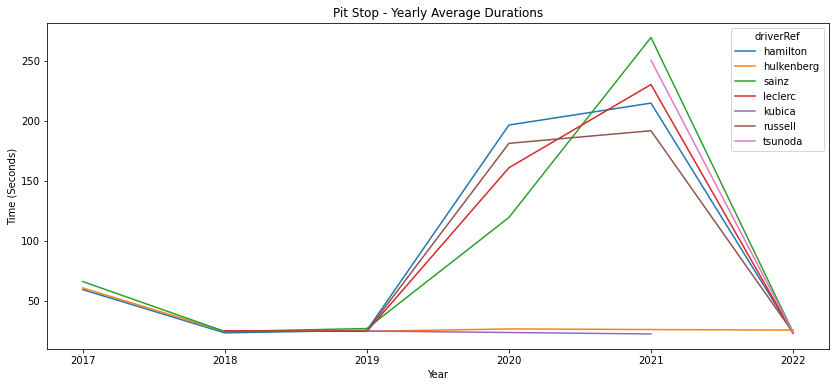

In [166]:
pit_stops.head()

pit_stops['seconds'] = pit_stops['milliseconds'] / 1000
rd.seed(24602)
picked_drivers = rd.sample(pit_stops['driverRef'].unique().tolist(), 15)

pit_stops_wrk = (
    pit_stops.loc[(pit_stops['driverRef'].isin(picked_drivers)) & (pit_stops.year >= 2017)]
        .groupby(['year', 'driverRef'], as_index = False)['seconds']
        .mean()
)

# Plot
plt.figure(figsize = (14, 6))
plt.title("Pit Stop - Yearly Average Durations")

sns.lineplot(data = pit_stops_wrk, x = 'year', y = 'seconds', hue = 'driverRef')

plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.pause(0.1)
plt.close()

We can see pit stops for each driver generally trending up and down together, presumably throughout pit-stop regulation changes that would affect all teams. 2017 seemed to have marginally longer pit stops on average, possibly due to [changes to regulations that allowed heavier tyres](https://www.formula1.com/en/championship/inside-f1/rules-regs/2017-season-changes.html). The most drastic changes, however, are seen from 2020 onwards. This is likely the product of [regulation changes](https://the-race.com/formula-1/new-f1-pitstop-rules-could-hit-a-decisive-red-bull-advantage/) that required the front jack to only begin being released once all wheel guns have signalled completion, and also a 0.2s pause required between jack release and the driver being allowed to exit their pit box.